# SEGMENTING & CLUSTERING Neighborhoods in Toronto CMV

##  EXERCISE PART 1 - WEB SCRAPPING AND DATA WRANGLING

In [1]:
#from bs4 import BeautifulSoup
#import requests

import numpy as np
import pandas as pd

### Wikipedia web scrapping

In [2]:
#BeautifulSoup not needed, using read_html instead 

temp=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
barrios = temp[0]
barrios.columns=barrios.loc[0]
barrios= barrios.drop(labels=[0],axis=0)
print(barrios.shape)

(288, 3)


### Ignore cells with "Not assigned" Borough

In [3]:
b=barrios.drop(barrios[barrios['Borough']=="Not assigned"].index)
b=b.reset_index()
del(b["index"])

### Cells with "Not assigned" Neighbourhood inherit their Borough

In [4]:
for indice_fila,fila in b.iterrows():
     if b.loc[indice_fila,'Neighbourhood']=="Not assigned":
            b.loc[indice_fila,'Neighbourhood']=b.loc[indice_fila,'Borough']
b.describe()   

,Postcode,Borough,Neighbourhood
count,211,211,211
unique,103,11,209
top,M9V,Etobicoke,St. James Town
freq,8,45,2


### Sorting values, an Erase column and iterative algorithm

In [5]:
b.sort_values(by=['Postcode','Neighbourhood'],inplace=True)
b=b.reset_index()
del(b["index"])

b2=b
b2['Erase']=True
if b.shape[0]>0 :
    filb=0 
    while filb < b.shape[0] :
            filb2=filb
            cabecera=True
            mismogrupo=True
            postcode_ant= b.loc[filb,'Postcode']
            while (filb < b.shape[0])& (mismogrupo==True) :
                    if cabecera==True:
                        cabecera=False
                        b2.loc[filb2,'Erase']=False
                    else:    
                        b2.loc[filb2,'Neighbourhood']=b2.loc[filb2,'Neighbourhood']+","+b.loc[filb,'Neighbourhood']
                    filb =filb+1
                    if filb < b.shape[0] :
                         mismogrupo=(b.loc[filb,'Postcode']==postcode_ant)                  
else:
    print("Dataframe vacio")

### Erase non summarized rows

In [6]:
b2.drop(b2[b2['Erase']==True].index,inplace=True)
del(b2['Erase'])
b2=b2.reset_index()
del(b2["index"])
b2

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern,Rouge"
1,M1C,Scarborough,"Highland Creek,Port Union,Rouge Hill"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


### Checking rows number in dataframe b2 equals unique postcodes obtained previously with b.describe()

In [7]:
b2.shape

(103, 3)

##  EXERCISE PART 2 - ADDING POSTCODE GEOGRAPHICAL COORDINATES 

In [8]:
# Renaming columns according to model given

b2=b2.rename(columns={'Postcode':'PostalCode','Neighbourhood':'Neighborhood'})

# Reading coordinates file

coordfile="http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv"
coordf=pd.read_csv(coordfile)
coordf.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
b2=b2.merge(coordf,left_on='PostalCode',right_on='Postal Code')
del(b2['Postal Code'])
b2

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Port Union,Rouge Hill",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


#  EXERCISE PART 3 - Segmenting & Clustering Toronto Neighborhoods

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


In [11]:
print('The dataframe b2 has {} boroughs and {} neighborhoods.'.format(
        len(b2['Borough'].unique()),
        b2.shape[0]
    )
)

The dataframe b2 has 11 boroughs and 103 neighborhoods.


#### Use geopy library to get the latitude and longitude values of Toronto City (Canada)

In [12]:
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


In [13]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(b2['Latitude'], b2['Longitude'], b2['Borough'], b2['Neighborhood']):
    label = '{}, {}'.format(neighborhood,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Create a new dataframe with boroughs containing word "Toronto"

In [14]:
tor_neigh=b2                        
for indice_fila,fila in tor_neigh.iterrows():
     if str(tor_neigh.loc[indice_fila,'Borough']).find('Toronto') == -1 :
            tor_neigh.drop(indice_fila, inplace=True)
            
tor_neigh=tor_neigh.reset_index()
del(tor_neigh["index"])
print(tor_neigh.shape)
tor_neigh

(38, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"Riverdale,The Danforth West",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar,The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049


In [15]:
address = 'Downtown Toronto, Ontario'
geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Downtown Toronto, Ontario are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Downtown Toronto, Ontario are 43.655115, -79.380219.


#### Create map of Toronto using latitude and longitude values for boroughs including "Toronto" word in ther name

In [16]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, borough, neighborhood in zip(tor_neigh['Latitude'], tor_neigh['Longitude'],tor_neigh['Borough'],tor_neigh['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [17]:
CLIENT_ID = 'OP1TJ1CKHYINOF4TBY0W4LZP41QI3UJ5S1LLGP22CZDO02NY' # your Foursquare ID
CLIENT_SECRET = 'CW0FII04GMB04EFCBTESPLHBF0OZMLDP2BLHZGVWASPQYWPL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OP1TJ1CKHYINOF4TBY0W4LZP41QI3UJ5S1LLGP22CZDO02NY
CLIENT_SECRET:CW0FII04GMB04EFCBTESPLHBF0OZMLDP2BLHZGVWASPQYWPL


#### Let's create a function to get a maximum of LIMIT venues surronding a given neighborhood coordinates              

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Get the venues for all rows in our subset of neighbours including "Toronto" in their Borough name

In [19]:
LIMIT=100
toronto_venues = getNearbyVenues(names=tor_neigh['Neighborhood'],
                                   latitudes=tor_neigh['Latitude'],
                                   longitudes=tor_neigh['Longitude']
                                  )


The Beaches
Riverdale,The Danforth West
India Bazaar,The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront,Regent Park
Garden District,Ryerson
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
North Midtown,The Annex,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
Bathurst Quay,CN Tower,Harbourfront West,Island airport,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvall

In [20]:
print(toronto_venues.shape)
toronto_venues.head()

(1700, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,St-Denis Studios Inc.,43.675031,-79.288022,Music Venue
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"Riverdale,The Danforth West",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


#### Let's check how many venues were returned for each neighborhood

In [21]:
tovg=toronto_venues.groupby('Neighborhood').count()
print(tovg.shape)
tovg

(38, 6)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
"Bathurst Quay,CN Tower,Harbourfront West,Island airport,King and Spadina,Railway Lands,South Niagara",15,15,15,15,15,15
Berczy Park,57,57,57,57,57,57
"Brockton,Exhibition Place,Parkdale Village",19,19,19,19,19,19
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"Cabbagetown,St. James Town",44,44,44,44,44,44
Central Bay Street,88,88,88,88,88,88
"Chinatown,Grange Park,Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


#### Let's see a graphical distribution of number of venues (Limit was 100)

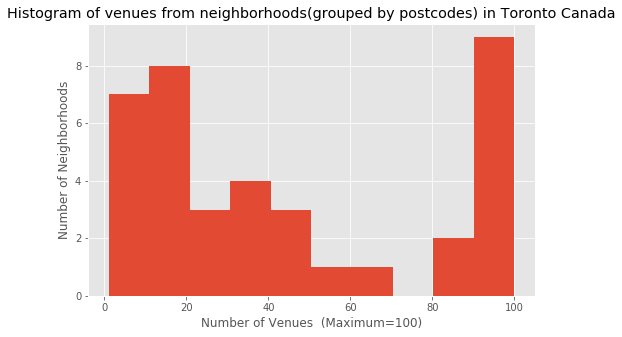

In [22]:
tovg['Venue'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of venues from neighborhoods(grouped by postcodes) in Toronto Canada') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') #  y-label
plt.xlabel('Number of Venues  (Maximum=100)') # x-label

plt.show()

# We will observe 29% neighborhoods--> >=80 venues, 32% --> 20-70 venues,    39% nb--->   <20 venues

#### Let's find out how many unique categories can be curated from all the returned venues

In [23]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 236 uniques categories.


###  Analyze Each Neighborhood

In [24]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column as dataframe first column

toronto_onehot['Neighborhood']=toronto_venues['Neighborhood']
columna = toronto_onehot.pop('Neighborhood') 
toronto_onehot.insert(0,'Neighborhood',columna)

print(toronto_onehot.shape)
toronto_onehot.head()

(1700, 236)


,Neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [25]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.shape)
toronto_grouped

(38, 236)


,Neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.040000,0.000000,0.00,0.000000,0.010000,0.010000,0.000000,0.020000,0.0000,0.000000,0.000000,0.0000,0.000000,0.030000,0.000000,0.030000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01,0.020000,0.000000,0.000000,0.030000,0.010000,0.00,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.060000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.00,0.000000,0.020000,0.000000,0.000000,0.000000

#### Let's print each neighborhood along with the top 5 most common venues

In [26]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2           Steakhouse  0.04
3      Thai Restaurant  0.04
4  American Restaurant  0.04


----Bathurst Quay,CN Tower,Harbourfront West,Island airport,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.20
1    Airport Lounge  0.13
2  Airport Terminal  0.13
3     Boat or Ferry  0.07
4           Airport  0.07


----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2    Restaurant  0.04
3          Café  0.04
4      Beer Bar  0.04


----Brockton,Exhibition Place,Parkdale Village----
            venue  freq
0  Breakfast Spot  0.11
1     Coffee Shop  0.11
2            Café  0.11
3    Climbing Gym  0.05
4   Grocery Store  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.12
1         Yoga Studio  0.06
2       Auto Workshop  0.06
3    

#### Let's put that into a *pandas* dataframe

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Steakhouse,American Restaurant,Thai Restaurant,Hotel,Burger Joint,Bar,Bakery,Gym
1,"Bathurst Quay,CN Tower,Harbourfront West,Islan...",Airport Service,Airport Terminal,Airport Lounge,Plane,Sculpture Garden,Boutique,Boat or Ferry,Harbor / Marina,Airport Gate,Airport
2,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Steakhouse,Seafood Restaurant,Cheese Shop,Café,Farmers Market,Restaurant
3,"Brockton,Exhibition Place,Parkdale Village",Café,Breakfast Spot,Coffee Shop,Grocery Store,Bar,Caribbean Restaurant,Italian Restaurant,Stadium,Furniture / Home Store,Burrito Place
4,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Park,Recording Studio


###  Cluster Neighborhoods - 5 Clusters

In [29]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = tor_neigh

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Music Venue,Health Food Store,Pub,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
1,M4K,East Toronto,"Riverdale,The Danforth West",43.679557,-79.352188,1,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Furniture / Home Store,Italian Restaurant,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant
2,M4L,East Toronto,"India Bazaar,The Beaches West",43.668999,-79.315572,1,Sandwich Place,Park,Burger Joint,Italian Restaurant,Steakhouse,Fish & Chips Shop,Fast Food Restaurant,Liquor Store,Brewery,Pet Store
3,M4M,East Toronto,Studio District,43.659526,-79.340923,1,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Sandwich Place,Bar,Stationery Store,Fish Market,Latin American Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Park,Construction & Landscaping,Swim School,Bus Line,Yoga Studio,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 5 clusters: We observe a big cluster(cluster 1), 1 cluster with 2 neighborhoods(cluster 2), and 3 clusters with only 1 neighboorhood(clusters 0,3 and 4).  That means a big similarity among majority of neighboorhoods. 

#### 4 clusters:  Beaches(c4) and Lawrence Park(c3) come into the big cluster,  cluster formed by 2 neighborhoods(2) remains and surprisingly Forest Hill goes from the big cluster into a new cluster formed only by himself.

#### 6 clusters only differs from 5 clusters that cluster 2 -the one with 2 neighborhoods- divides each neighborhood into a new cluster

### Examine Clusters

#### Cluster 0

In [32]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,0,Garden,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


####  Garden and ethnic restaurants (turkish -falafel, doner-, ehiopian,...)

#### Cluster 1

In [33]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,East Toronto,1,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Furniture / Home Store,Italian Restaurant,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant
2,East Toronto,1,Sandwich Place,Park,Burger Joint,Italian Restaurant,Steakhouse,Fish & Chips Shop,Fast Food Restaurant,Liquor Store,Brewery,Pet Store
3,East Toronto,1,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Sandwich Place,Bar,Stationery Store,Fish Market,Latin American Restaurant
5,Central Toronto,1,Gym,Hotel,Sandwich Place,Park,Breakfast Spot,Clothing Store,Food & Drink Shop,Discount Store,Dog Run,Doner Restaurant
6,Central Toronto,1,Clothing Store,Coffee Shop,Yoga Studio,Fast Food Restaurant,Pet Store,Chinese Restaurant,Rental Car Location,Dessert Shop,Salon / Barbershop,Diner
7,Central Toronto,1,Sandwich Place,Dessert Shop,Pizza Place,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Gourmet Shop,Indian Restaurant,Seafood Restaurant
9,Central Toronto,1,Coffee Shop,Pub,Pizza Place,Sushi Restaurant,Bagel Shop,Fried Chicken Joint,Sports Bar,American Restaurant,Convenience Store,Vietnamese Restaurant
11,Downtown Toronto,1,Coffee Shop,Pub,Pizza Place,Restaurant,Café,Market,Italian Restaurant,Bakery,Playground,Liquor Store
12,Downtown Toronto,1,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Nightclub,Bubble Tea Shop,Men's Store,Café,Mediterranean Restaurant
13,Downtown Toronto,1,Coffee Shop,Café,Park,Pub,Bakery,Theater,Breakfast Spot,Mexican Restaurant,Event Space,Farmers Market


####  This is the bigger cluster, most remarkable:  coffe shops, café, restaurants, hotels,

#### Cluster 2

In [34]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,2,Playground,Tennis Court,Trail,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant
10,Downtown Toronto,2,Park,Playground,Trail,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


####  Playground,tennis court,trail,yoga----> Sports neighborhoods

#### Cluster 3

In [35]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,3,Park,Construction & Landscaping,Swim School,Bus Line,Yoga Studio,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


#### Park, construction&Landscaping, ehtnic restaurants, bus line, event space ---> Park, outskirts

#### Cluster 4

In [36]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,4,Music Venue,Health Food Store,Pub,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


####  Music, pub, events space,   dep stores,restaurants (mall?) 